Лабораторная работа №8

In [174]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

In [175]:
Grop1 =  randint(1, 10, 10)
Grop2 =  randint(1, 10, 10)
Grop3 =  randint(1, 10, 10)
data = pd.DataFrame({
    "Група1":Grop1,
    "Група2":Grop2,
    "Група3":Grop3,
},index=np.arange(1, 11))
n = data.shape[0]

data

,Група1,Група2,Група3
1,7,2,5
2,9,3,9
3,7,8,5
4,9,2,6
5,8,5,1
6,4,3,6
7,2,5,9
8,6,5,6
9,8,8,6
10,7,8,4


1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [176]:
data_data = pd.DataFrame({
    "Название": ["Среднее отклонение","Стандартное отклонение"],
    "Група1":[sum(data.iloc[:,0]/n), data.iloc[:,0].std()],
    "Група2":[sum(data.iloc[:,1]/n), data.iloc[:,1].std()],
    "Група3": [sum(data.iloc[:,2]/n), data.iloc[:,2].std()]
})
data_data

,Название,Група1,Група2,Група3
0,Среднее отклонение,6.700000,4.900000,5.700000
1,Стандартное отклонение,2.213594,2.424413,2.311805


2. Побудувати графік розкиду в групах.

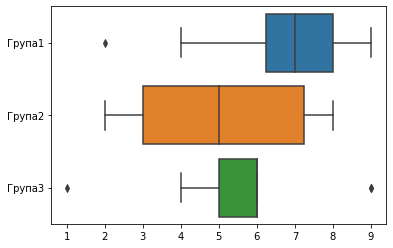

In [177]:
sns.boxplot(data=data, orient='h')

In [178]:
data.loc[data.shape[0]+1] = [sum(data.iloc[:,0]), sum(data.iloc[:,1]), sum(data.iloc[:,2])]
data.loc[data.shape[0]+1] = [round(data.iloc[n,0]/n, 2), round(data.iloc[n,1]/n, 2), round(data.iloc[n,2]/n, 2)]
n = data.shape[0]
data

,Група1,Група2,Група3
1,7.0,2.0,5.0
2,9.0,3.0,9.0
3,7.0,8.0,5.0
4,9.0,2.0,6.0
5,8.0,5.0,1.0
6,4.0,3.0,6.0
7,2.0,5.0,9.0
8,6.0,5.0,6.0
9,8.0,8.0,6.0
10,7.0,8.0,4.0


In [179]:
summa = sum(data.iloc[n-2, 0:])
print("Загальна сума: ", summa)
data

Загальна сума:  173.0


,Група1,Група2,Група3
1,7.0,2.0,5.0
2,9.0,3.0,9.0
3,7.0,8.0,5.0
4,9.0,2.0,6.0
5,8.0,5.0,1.0
6,4.0,3.0,6.0
7,2.0,5.0,9.0
8,6.0,5.0,6.0
9,8.0,8.0,6.0
10,7.0,8.0,4.0


3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [180]:
def dispers(data, n):    
    first_sum = data.iloc[n-2,0]
    second_sum = data.iloc[n-2,1]
    third_sum = data.iloc[n-2, 2]
    Tc2 = first_sum**2 + second_sum**2 + third_sum**2
    c = data.shape[1]-1
    n = data.shape[0]-2
    N = n*c
    sum2 = sum(data.iloc[n, 0:])**2
    constanta = sum2/N
    xi2 = 0
    for i in range(0, n):
        xi2 += data.iloc[i, 0]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 1]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 2]**2
    
    SSfact = Tc2/n - constanta
    print("SSфактичне:", SSfact)
    SSzag = xi2 - sum2/N
    print("SSзагальне:", SSzag)
    SSvip = SSzag - SSfact
    print("SSвипадкове:", SSvip)
    
    dfact = c - 1
    print("\ndфактичне:", dfact)
    dzag = N - 1
    print("dзагальне:", dzag)
    dvip = dzag - dfact
    print("dвипадкове:", dvip)
    
    MSfact = SSfact/dfact
    print("\nMSфактичне:", MSfact)
    MSvip = SSvip/dvip
    print("MSвипадкове:", MSvip)
    
    Femp = MSfact/MSvip
    print("\nFемпіричне", Femp)
    Fcrit = pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx").iloc[dzag-2, dfact]
    if (Fcrit >= Femp):
        print("Рівність середніх підтверджена", Fcrit, ">", Femp)
    else:
        print("Рівність середніх не підтверджена", Fcrit, "<", Femp)
    
    data_end = pd.DataFrame({
        "Назва":["Фактичне", "Випадкове", "Загальне"],
        "SS":[SSfact, SSvip, SSzag],
        "d":[dfact, dvip, dzag],
        "MS":[MSfact, MSvip, None]
    })
    return data_end

4.Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

5.Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок

In [181]:
dispers(data, n)

SSфактичне: -482.55000000000007
SSзагальне: -337.45000000000005
SSвипадкове: 145.10000000000002

dфактичне: 1
dзагальне: 19
dвипадкове: 18

MSфактичне: -482.55000000000007
MSвипадкове: 8.061111111111112

Fемпіричне -59.861474844934534
Рівність середніх підтверджена 4.4 > -59.861474844934534


,Назва,SS,d,MS
0,Фактичне,-482.55,1,-482.550000
1,Випадкове,145.10,18,8.061111
2,Загальне,-337.45,19,NaN
